# LAB 10: PROCESAMIENTO DE SEÑALES ECG  

#### **Tabla de Contenido**  

1. [Introducción](#introduccion)  
2. [Objetivos](#objetivos)  
3. [Materiales](#materiales)  
4. [Procedimiento](#procedimiento)  
5. [Resultados](#resultados)  
6. [Discusión](#discusion)  
7. [Conclusiones](#conclusiones)  
8. [Bibliografía](#bibliografia)  
    






 

 

   

 


 


## Introducción  

## Objetivos  

## Materiales  

## Procedimiento 

## Resultados 

-  ### Basal

#### DI


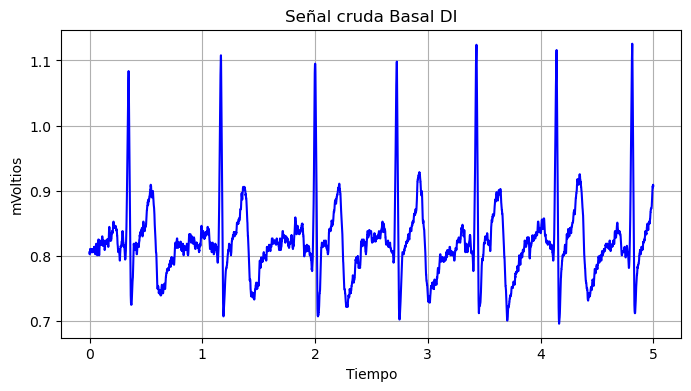

c:\Users\rogge\anaconda3\envs\mne\Lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:529: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(


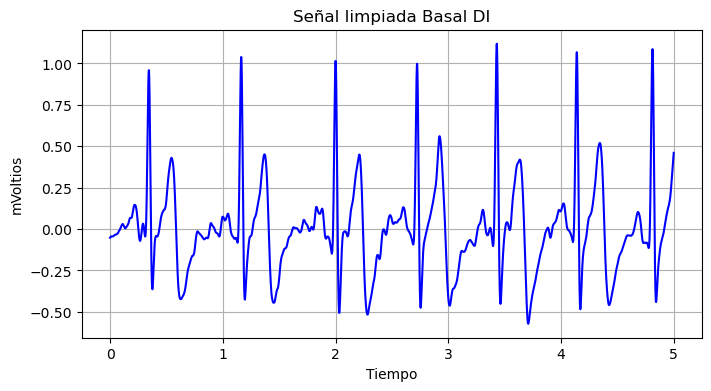

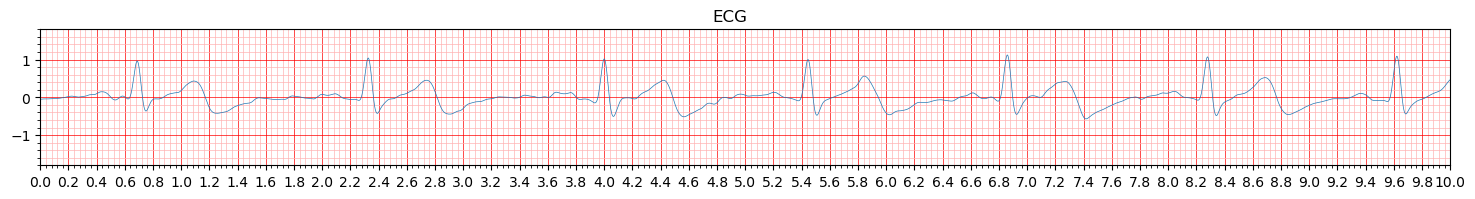

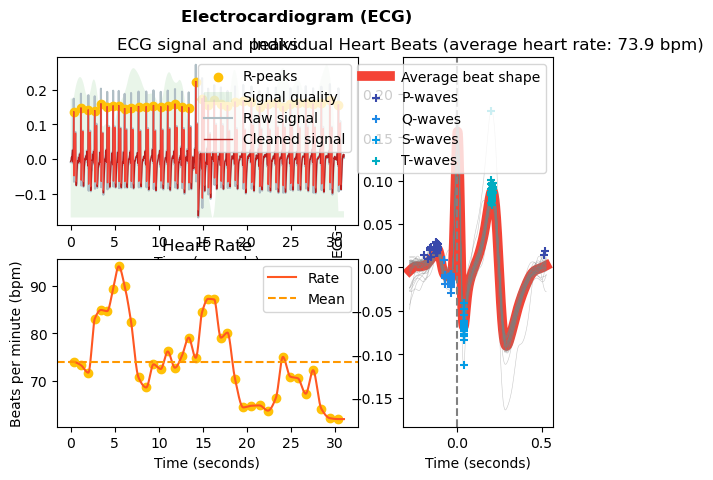

In [40]:
R1 = funcion_leer("basal/R1.txt")  # Carga la señal cruda desde un archivo
report, signals, info = procesar_ecg(R1,"Basal DI")

#### DII


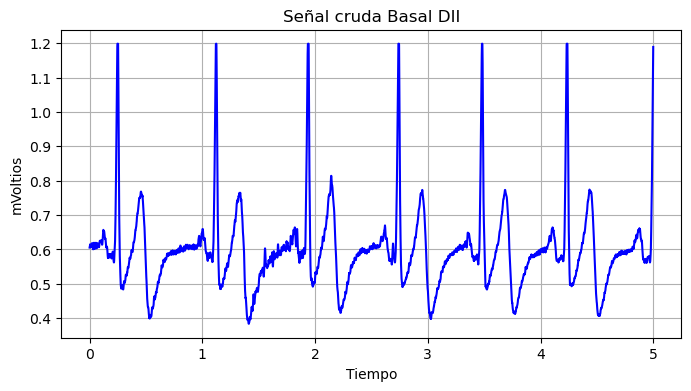

c:\Users\rogge\anaconda3\envs\mne\Lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:529: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(


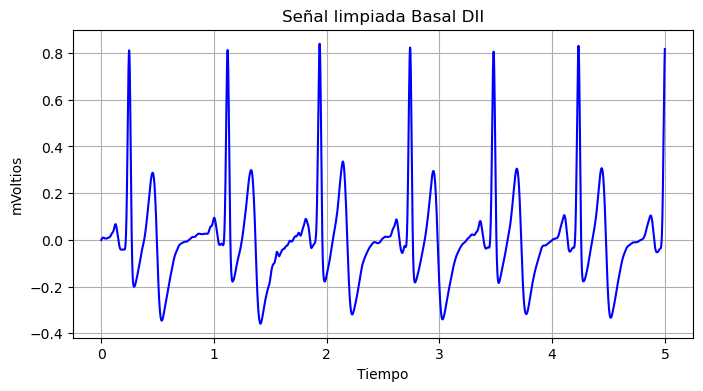

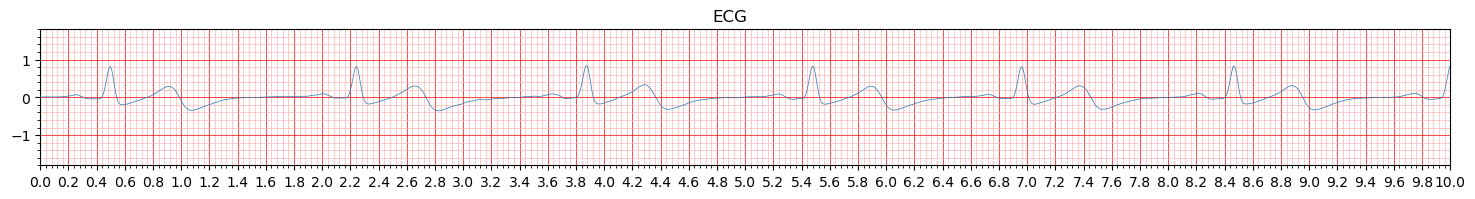

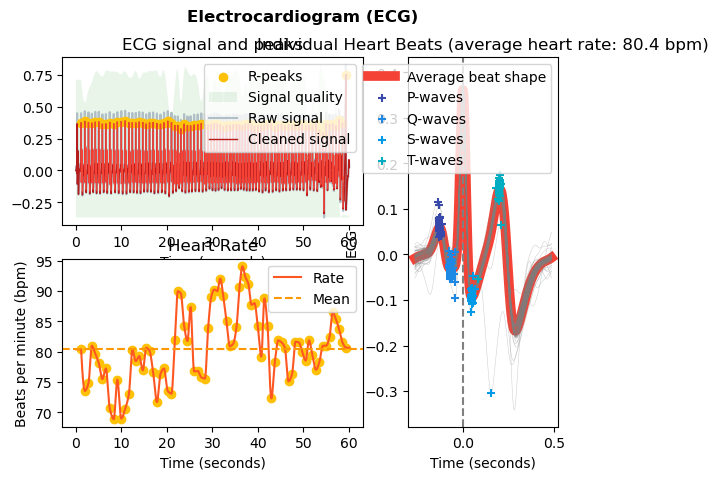

In [41]:
R2 = funcion_leer("basal/R2.txt")  # Carga la señal cruda desde un archivo
report, signals, info = procesar_ecg(R2,"Basal DII")

#### DIII


-  ### Aguntar la respiración 10 segundos

#### DI








#### DII








#### DIII



-  ### Post ejercicio


#### DI







#### DII









#### DIII



## Discusión

## Bibliografía 

## Anexos  

### Función para leer datos Bitalino

In [5]:
# Función para leer el archivo de texto y extraer la señal de ECG
import pandas as pd
import numpy as np
def funcion_leer(nombre):
    # Leer el archivo
    with open(nombre, 'r') as file:
        # Saltar las líneas de encabezado hasta que termine el EndOfHeader
        while True:
            line = file.readline()
            if "EndOfHeader" in line:
                break
        
        # Cargar los datos en un DataFrame
        data = pd.read_csv(file, delimiter='\t', header=None)
        
    # Seleccionar solo la quinta columna (índice 4 ya que Python empieza desde 0)
    columna_5 = data.iloc[:, 5]
    # Convertir la columna a un array de NumPy
    array_np = np.array(columna_5)
    return array_np

### Función para plotear ECG y analizarla


In [39]:
import neurokit2 as nk
import matplotlib.pyplot as plt
import ecg_plot


def procesar_ecg(signal_raw, nombre,sampling_rate=1000,max_voltage=1.5,rango1=0,rango2=5000):
    # Escalar la señal cruda al rango de 0 a 1.2 V
    signal_scaled = (signal_raw / max(signal_raw)) * 1.2
    plt.figure(figsize=(8,4))

    plt.plot((np.arange(len(signal_scaled))/1000)[rango1:rango2],signal_scaled[rango1:rango2],"b")
    plt.title(f"Señal cruda {nombre}")
    plt.xlabel("Tiempo")
    plt.ylabel("mVoltios")
    plt.grid()
    plt.show()

    # Limpiar la señal
    signal_cleaned = nk.ecg_clean(signal_scaled, sampling_rate=sampling_rate)

    # Verificar si la señal limpiada tiene longitud válida
    if len(signal_cleaned) > 0:
        # Procesar la señal
        signals, info = nk.ecg_process(signal_cleaned, sampling_rate=sampling_rate)
        
        # Analizar la señal
        report = nk.ecg_analyze(signals, sampling_rate=sampling_rate)

        # Escalar la señal limpiada a un nuevo voltaje máximo (1.5 V en este caso)
        signal_cleaned_scaled = (signal_cleaned / max(signal_cleaned)) * max_voltage
        plt.figure(figsize=(8,4))

        plt.plot((np.arange(len(signal_cleaned_scaled))/1000)[rango1:rango2],signal_cleaned_scaled[rango1:rango2],"b")
        plt.title(f"Señal limpiada {nombre}")
        plt.xlabel("Tiempo")
        plt.ylabel("mVoltios")
        plt.grid()
        plt.show()

        # Graficar la señal escalada y limpiada
        ecg_plot.plot_1(signal_cleaned_scaled[0:5000])
        nk.ecg_plot(signals, info)

        return report, signals, info
    else:
        print("Error: La señal limpiada está vacía. Revisa la señal original y el proceso de limpieza.")
        return None, None, None